# Analysing criminal data from NY between 2014 and 2015

In [211]:
%pylab inline
import numpy
import pandas
import matplotlib.pyplot as plt
import dateutil.parser as parser
import datetime
import seaborn as sns
from pylab import savefig

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Creating functions

In [212]:
def getYear(date):
    try:
        year = date.strftime('%Y-%m-%d')
        return parser.parse(year).year
    except:
        return np.nan
    
def getMonth(date):
    try:
        month = date.strftime('%Y-%m-%d')
        return parser.parse(month).month
    except:
        return np.nan
    
def getMonthDesc(date):
    try:
        return date.strftime('%B')
    except:
        return np.nan
    
def getDay(date):
    try:
        day = date.strftime('%Y-%m-%d')
        return parser.parse(day).day
    except:
        return np.nan
    
def getHour(date):
    try:
        return int(date.strftime('%H:%m').split(':')[0])
    except:
        return np.nan
    
def getMinute(date):
    try:
        return int(date.strftime('%H:%m').split(':')[1])
    except:
        return np.nan

### Reading data historic

In [213]:
ds = pandas.read_csv("NYPD_Complaint_Data_Historic.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
ds.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314,241257,40.82884833,-73.91666114,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103,OUTSIDE,NaN,NaN,NaN,1043991,193406,40.69733814,-73.78455674,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",...,28,NaN,OTHER,NaN,NaN,999463,231690,40.80260661,-73.94505191,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,105,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183,177862,40.65454944,-73.72633879,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,13,FRONT OF,OTHER,NaN,NaN,987606,208148,40.7380024,-73.98789129,"(40.7380024, -73.98789129)"


### Exploring data

In [214]:
ds.shape

(1048575, 24)

In [215]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
CMPLNT_NUM           1048575 non-null object
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048575 non-null object
CMPLNT_TO_DT         842616 non-null object
CMPLNT_TO_TM         843002 non-null object
RPT_DT               1048575 non-null object
KY_CD                1048575 non-null object
OFNS_DESC            1045695 non-null object
PD_CD                1047842 non-null object
PD_DESC              1047842 non-null object
CRM_ATPT_CPTD_CD     1048574 non-null object
LAW_CAT_CD           1048575 non-null object
JURIS_DESC           1048575 non-null object
BORO_NM              1048575 non-null object
ADDR_PCT_CD          1048574 non-null object
LOC_OF_OCCUR_DESC    830823 non-null object
PREM_TYP_DESC        1043886 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016158 non-null ob

In [216]:
ds.describe()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
count,1048575,1048510,1048575,842616,843002,1048575,1048575,1045695,1047842,1047842,...,1048574,830823,1043886,7599,51772,1016158,1016158,1016158,1016158,1016158
unique,1048575,2510,1440,1662,1440,804,72,68,384,373,...,77,5,70,863,268,57769,60874,87484,87500,87607
top,249745434,1/1/2014,12:00:00,10/17/2014,12:00:00,7/23/2015,341,PETIT LARCENY,101,ASSAULT 3,...,75,INSIDE,STREET,CENTRAL PARK,CASTLE HILL,987220,212676,40.75043077,-73.98928218,"(40.750430768, -73.989282176)"
freq,1,2211,27794,1367,14347,1696,180246,180246,93214,93214,...,36460,549718,320261,543,1106,3195,3227,3178,3178,3178


### Check the amount of null data in the file


In [217]:
for col in list(ds.columns.values):
    print ("Number of missing data on " + col,ds[col].isnull().values.sum())

Number of missing data on CMPLNT_NUM 0
Number of missing data on CMPLNT_FR_DT 65
Number of missing data on CMPLNT_FR_TM 0
Number of missing data on CMPLNT_TO_DT 205959
Number of missing data on CMPLNT_TO_TM 205573
Number of missing data on RPT_DT 0
Number of missing data on KY_CD 0
Number of missing data on OFNS_DESC 2880
Number of missing data on PD_CD 733
Number of missing data on PD_DESC 733
Number of missing data on CRM_ATPT_CPTD_CD 1
Number of missing data on LAW_CAT_CD 0
Number of missing data on JURIS_DESC 0
Number of missing data on BORO_NM 0
Number of missing data on ADDR_PCT_CD 1
Number of missing data on LOC_OF_OCCUR_DESC 217752
Number of missing data on PREM_TYP_DESC 4689
Number of missing data on PARKS_NM 1040976
Number of missing data on HADEVELOPT 996803
Number of missing data on X_COORD_CD 32417
Number of missing data on Y_COORD_CD 32417
Number of missing data on Latitude 32417
Number of missing data on Longitude 32417
Number of missing data on Lat_Lon 32417


In [218]:
# The total of PD_DESC null is MURDER & NON-NE in OFNS_DESC
ds[ds['PD_DESC'].isnull()].groupby(['OFNS_DESC']).size().to_frame('size').reset_index()

,OFNS_DESC,size
0,MURDER & NON-NEGL. MANSLAUGHTER,733


In [219]:
print(ds[ds['OFNS_DESC'] == 'MURDER & NON-NEGL. MANSLAUGHTER'].shape[0])
print(ds[ds['PD_DESC'].isnull()].shape[0])
# When PD_DESC is null, OFNS_DESC é MURDER & NON-NEGL. MANSLAUGHTER

733
733


In [220]:
# Total of PD_DESC
ds.groupby(['PD_DESC']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])

,PD_DESC,size
21,ASSAULT 3,93214
123,"HARASSMENT,SUBD 3,4,5",89064
204,"LARCENY,PETIT FROM STORE-SHOPL",57638
199,"LARCENY,PETIT FROM BUILDING,UN",47733
8,AGGRAVATED HARASSMENT 2,44246
122,"HARASSMENT,SUBD 1,CIVILIAN",44116
20,"ASSAULT 2,1,UNCLASSIFIED",34791
236,"MISCHIEF, CRIMINAL 4, OF MOTOR",31401
197,"LARCENY,PETIT FROM AUTO",29061
79,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",28411


In [221]:
# Verify if there are some PD_DESC with description that contains "MURDER"
ds[['PD_DESC']][ds['PD_DESC'].str.contains("MURDER") == True]

,PD_DESC


In [222]:
ds[ds['CRM_ATPT_CPTD_CD'].isnull()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
899205,448788620,2/26/2014,21:20:00,NaN,NaN,2/26/2014,341,PETIT LARCENY,338,"LARCENY,PETIT FROM BUILDING,UN",...,6,INSIDE,BAR/NIGHT CLUB,NaN,NaN,984440,204596,40.72825367,-73.99931593,"(40.728253665, -73.999315931)"


In [223]:
# Checking the streets name with their total occurrences
ds[ds['ADDR_PCT_CD'].notnull()].groupby(['ADDR_PCT_CD']).size().to_frame('size').reset_index()

,ADDR_PCT_CD,size
0,1,12171
1,10,8415
2,100,5901
3,101,9672
4,102,13326
5,103,18521
6,104,14033
7,105,15809
8,106,13143
9,107,10111


### Changing date format

In [224]:
date = pandas.to_datetime(ds['CMPLNT_FR_DT'], errors = 'coerce')
time = pandas.to_datetime(ds['CMPLNT_FR_TM'], errors = 'coerce')
date_register = pandas.to_datetime(ds['RPT_DT'], errors = 'coerce')

ds['year'] = date.apply(getYear)
ds['month'] = date.apply(getMonth)
ds['month_desc'] = date.apply(getMonthDesc)
ds['day'] = date.apply(getDay)
ds['hour'] = time.apply(getHour)
ds['minute'] = time.apply(getMinute)

ds['year_register'] = date_register.apply(getYear)
ds['month_register'] = date_register.apply(getMonth)
ds['day_register'] = date_register.apply(getDay)

#del ds["CMPLNT_FR_DT"]
#del ds["CMPLNT_FR_TM"]
#del ds["RPT_DT"]

In [225]:
ds.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Lat_Lon,year,month,month_desc,day,hour,minute,year_register,month_register,day_register
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,"(40.828848333, -73.916661142)",2015.0,12.0,December,31.0,23,5,2015,12,31
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,"(40.697338138, -73.784556739)",2015.0,12.0,December,31.0,23,5,2015,12,31
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",...,"(40.802606608, -73.945051911)",2015.0,12.0,December,31.0,23,5,2015,12,31
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,"(40.654549444, -73.726338791)",2015.0,12.0,December,31.0,23,5,2015,12,31
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,"(40.7380024, -73.98789129)",2015.0,12.0,December,31.0,23,5,2015,12,31


In [226]:
# Checking null value from ADDR_PCT_CD
ds[ds['ADDR_PCT_CD'].isnull()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Lat_Lon,year,month,month_desc,day,hour,minute,year_register,month_register,day_register
329156,594173303,5/5/2015,0:01:00,5/5/2015,10:30:00,5/5/2015,351,CRIMINAL MISCHIEF & RELATED OF,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",...,NaN,2015.0,5.0,May,5.0,0,5,2015,5,5


### Checking null values from CMPLNT_FR_DT and diff between day and day_register

In [227]:
# Checking null values from CMPLNT_FR_DT
total_dt = 0
code_dt_diff = []
dt_diff = []
ds_filter_dt = ds[['day', 'day_register', 'CMPLNT_NUM']][ds['CMPLNT_FR_DT'].notnull()][ds['day'].notnull()]

for item in range(ds_filter_dt.shape[0]):
    if int(ds_filter_dt.iloc[item, 0]) != int(ds_filter_dt.iloc[item, 1]):
        total_dt += 1
        code_dt_diff.append(ds_filter_dt.iloc[item, 2])
        dt_diff.append(int(ds_filter_dt.iloc[item, 1]) - int(ds_filter_dt.iloc[item, 0]))

print (total_dt)
print (ds_filter_dt.shape[0])
print (((total_dt * 100) / ds_filter_dt.shape[0]))

355177
1048503
33.874676562680314


In [228]:
# Average diff between day and day register
print (sum(dt_diff) / float(len(dt_diff)))

0.481703488683


In [229]:
ds_group = ds[ds['CMPLNT_NUM'].isin(code_dt_diff)]\
    .groupby('PD_DESC')\
    .size()\
    .to_frame('size')\
    .reset_index()\
    .sort_values(['size'], ascending=[False])[0:20]
    
ds_group['Percentage'] = 100 * ds_group['size']  / ds_group['size'].sum()
ds_group

,PD_DESC,size,Percentage
111,"HARASSMENT,SUBD 3,4,5",29268,13.080203
184,"LARCENY,PETIT FROM BUILDING,UN",23058,10.304883
8,AGGRAVATED HARASSMENT 2,22950,10.256617
182,"LARCENY,PETIT FROM AUTO",17852,7.978262
216,"MISCHIEF, CRIMINAL 4, OF MOTOR",17606,7.868322
18,ASSAULT 3,16794,7.505430
72,"CRIMINAL MISCHIEF 4TH, GRAFFIT",12520,5.595331
110,"HARASSMENT,SUBD 1,CIVILIAN",9758,4.360961
170,"LARCENY,GRAND OF AUTO",9538,4.262641
103,"FRAUD,UNCLASSIFIED-FELONY",9159,4.093261


In [230]:
ds_group = ds[ds['CMPLNT_NUM'].isin(code_dt_diff)]\
    .groupby('OFNS_DESC')\
    .size()\
    .to_frame('size')\
    .reset_index()\
    .sort_values(['size'], ascending=[False])[0:20]
    
ds_group['Percentage'] = 100 * ds_group['size']  / ds_group['size'].sum()
ds_group

,OFNS_DESC,size,Percentage
51,PETIT LARCENY,71703,20.865307
24,GRAND LARCENY,54797,15.945723
10,CRIMINAL MISCHIEF & RELATED OF,48571,14.133981
26,HARRASSMENT 2,39026,11.356421
41,OFF. AGNST PUB ORD SENSBLTY &,23068,6.712702
6,ASSAULT 3 & RELATED OFFENSES,20713,6.027406
8,BURGLARY,16072,4.676892
25,GRAND LARCENY OF MOTOR VEHICLE,11226,3.266724
59,THEFT-FRAUD,9283,2.701319
18,FELONY ASSAULT,8935,2.600052


### Checking null values from CMPLNT_FR_DT and without diff between day and day_register

In [231]:
# Checking null values from CMPLNT_FR_DT
total_dt = 0
dt_diff = []
ds_filter_dt = ds[['day', 'day_register', 'CMPLNT_NUM']][ds['CMPLNT_FR_DT'].notnull()][ds['day'].notnull()]

for item in range(ds_filter_dt.shape[0]):
    if int(ds_filter_dt.iloc[item, 0]) == int(ds_filter_dt.iloc[item, 1]):
        total_dt += 1
        dt_diff.append(ds_filter_dt.iloc[item, 2])

print (total_dt)
print (ds_filter_dt.shape[0])
print (((total_dt * 100) / ds_filter_dt.shape[0]))

693326
1048503
66.12532343731968


In [232]:
ds_group = ds[ds['CMPLNT_NUM'].isin(dt_diff)]\
    .groupby('PD_DESC')\
    .size()\
    .to_frame('size')\
    .reset_index()\
    .sort_values(['size'], ascending=[False])[0:20]
    
ds_group['Percentage'] = 100 * ds_group['size']  / ds_group['size'].sum()
ds_group

,PD_DESC,size,Percentage
21,ASSAULT 3,76415,16.193633
116,"HARASSMENT,SUBD 3,4,5",59789,12.670302
195,"LARCENY,PETIT FROM STORE-SHOPL",52561,11.138566
115,"HARASSMENT,SUBD 1,CIVILIAN",34355,7.280406
20,"ASSAULT 2,1,UNCLASSIFIED",27959,5.924986
190,"LARCENY,PETIT FROM BUILDING,UN",24670,5.227991
215,"MARIJUANA, POSSESSION 4 & 5",24504,5.192813
8,AGGRAVATED HARASSMENT 2,21290,4.511712
77,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",19414,4.114155
62,"CONTROLLED SUBSTANCE, POSSESSI",18084,3.832306


In [233]:
ds_group = ds[ds['CMPLNT_NUM'].isin(dt_diff)]\
    .groupby('OFNS_DESC')\
    .size()\
    .to_frame('size')\
    .reset_index()\
    .sort_values(['size'], ascending=[False])[0:20]
    
ds_group['Percentage'] = 100 * ds_group['size']  / ds_group['size'].sum()
ds_group

,OFNS_DESC,size,Percentage
53,PETIT LARCENY,108525,16.237580
26,HARRASSMENT 2,94143,14.085736
7,ASSAULT 3 & RELATED OFFENSES,93711,14.021100
11,CRIMINAL MISCHIEF & RELATED OF,54194,8.108541
13,DANGEROUS DRUGS,52622,7.873337
24,GRAND LARCENY,41424,6.197885
19,FELONY ASSAULT,34983,5.234179
58,ROBBERY,31281,4.680283
37,MISCELLANEOUS PENAL LAW,21707,3.247815
42,OFF. AGNST PUB ORD SENSBLTY &,21698,3.246469


### Checking null values from LOC_OF_OCCUR_DESC

In [234]:
# Checking  any tendences with LOC_OF_OCCUR_DESC null values
ds[['LOC_OF_OCCUR_DESC', 'PD_DESC', 'ADDR_PCT_CD', 'PREM_TYP_DESC']][ds['LOC_OF_OCCUR_DESC'].isnull()]

,LOC_OF_OCCUR_DESC,PD_DESC,ADDR_PCT_CD,PREM_TYP_DESC
2,NaN,"CONTROLLED SUBSTANCE,INTENT TO",28,OTHER
12,NaN,"LARCENY,GRAND FROM PERSON, BAG OPEN/DIP",14,STREET
13,NaN,"LARCENY,GRAND FROM PERSON,PICK",14,STREET
14,NaN,"FORGERY,ETC.,UNCLASSIFIED-FELO",67,STREET
20,NaN,"CONTROLLED SUBSTANCE, POSSESSI",71,STREET
22,NaN,"CONTROLLED SUBSTANCE, POSSESSI",108,STREET
27,NaN,WEAPONS POSSESSION 3,75,STREET
29,NaN,"INTOXICATED DRIVING,ALCOHOL",121,STREET
34,NaN,"ASSAULT 2,1,UNCLASSIFIED",13,PARK/PLAYGROUND
37,NaN,WEAPONS POSSESSION 3,52,STREET


### Checking  any tendences with PREM_TYP_DESC null values

In [235]:
# There are 71 differents kinds of place
print(len(ds['PREM_TYP_DESC'].unique()))

71


In [236]:
ds[ds['PREM_TYP_DESC'].isnull()][ds['year_register'] >= 2014]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Lat_Lon,year,month,month_desc,day,hour,minute,year_register,month_register,day_register
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,"(40.697338138, -73.784556739)",2015.0,12.0,December,31.0,23,5,2015,12,31
471,560286320,12/31/2015,9:05:00,NaN,NaN,12/31/2015,351,CRIMINAL MISCHIEF & RELATED OF,258,"CRIMINAL MISCHIEF 4TH, GRAFFIT",...,"(40.713313312, -73.766559358)",2015.0,12.0,December,31.0,9,5,2015,12,31
1093,940141475,12/17/2004,15:02:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,"(40.650467172, -73.957267875)",2004.0,12.0,December,17.0,15,5,2015,12,31
1597,267149114,12/30/2015,10:45:00,12/30/2015,11:00:00,12/30/2015,121,CRIMINAL MISCHIEF & RELATED OF,269,"MISCHIEF,CRIMINAL, UNCL 2ND",...,"(40.667265957, -73.952138463)",2015.0,12.0,December,30.0,10,5,2015,12,30
1608,512331467,12/30/2015,10:20:00,12/30/2015,10:40:00,12/30/2015,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,...,"(40.807479362, -73.960580679)",2015.0,12.0,December,30.0,10,5,2015,12,30
1768,586976434,12/30/2015,2:45:00,NaN,NaN,12/30/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,"(40.877554428, -73.872939471)",2015.0,12.0,December,30.0,2,5,2015,12,30
2363,388875685,7/21/1992,23:00:00,NaN,NaN,12/30/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,"(40.852141187, -73.922375722)",1992.0,7.0,July,21.0,23,5,2015,12,30
2823,994364993,12/29/2015,13:20:00,12/29/2015,13:30:00,12/29/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,"(40.708097868, -73.801467183)",2015.0,12.0,December,29.0,13,5,2015,12,29
2911,805663898,12/29/2015,11:00:00,12/29/2015,11:10:00,12/29/2015,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",...,"(40.75992938, -73.830313069)",2015.0,12.0,December,29.0,11,5,2015,12,29
2937,249761391,12/29/2015,9:45:00,12/29/2015,10:30:00,12/29/2015,341,PETIT LARCENY,338,"LARCENY,PETIT FROM BUILDING,UN",...,"(40.587410606, -73.994129232)",2015.0,12.0,December,29.0,9,5,2015,12,29


In [237]:
ds['PD_DESC'][ds['PREM_TYP_DESC'].isnull()][ds['year_register'] >= 2014].isnull().values.sum()

685

In [238]:
ds['OFNS_DESC'][ds['PREM_TYP_DESC'].isnull()][ds['year_register'] >= 2014].isnull().values.sum()

12

In [239]:
#ds[['OFNS_DESC', 'PD_DESC']][ds['PREM_TYP_DESC'].isnull()][ds['year_register'] >= 2014]

ds_group = ds[ds['PREM_TYP_DESC'].isnull()][ds['year_register'] >= 2014]\
    .groupby('OFNS_DESC')\
    .size()\
    .to_frame('size')\
    .reset_index()\
    .sort_values(['size'], ascending=[False])
    
ds_group['Percentage'] = 100 * ds_group['size']  / ds_group['size'].sum()
ds_group

,OFNS_DESC,size,Percentage
26,PETIT LARCENY,977,22.779203
15,GRAND LARCENY,757,17.649802
20,MURDER & NON-NEGL. MANSLAUGHTER,685,15.971089
17,HARRASSMENT 2,539,12.567032
21,OFF. AGNST PUB ORD SENSBLTY &,265,6.178596
6,CRIMINAL MISCHIEF & RELATED OF,249,5.805549
2,ASSAULT 3 & RELATED OFFENSES,203,4.733038
4,BURGLARY,126,2.937748
30,SEX CRIMES,73,1.702028
11,FELONY ASSAULT,60,1.398927


In [240]:
ds_group = ds[ds['PREM_TYP_DESC'].isnull()][ds['year_register'] >= 2014]\
    .groupby('PD_DESC')\
    .size()\
    .to_frame('size')\
    .reset_index()\
    .sort_values(['size'], ascending=[False])
    
ds_group['Percentage'] = 100 * ds_group['size']  / ds_group['size'].sum()
ds_group

,PD_DESC,size,Percentage
94,"LARCENY,PETIT FROM BUILDING,UN",718,19.856195
70,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",426,11.780973
48,"HARASSMENT,SUBD 3,4,5",382,10.564159
2,AGGRAVATED HARASSMENT 2,262,7.245575
7,ASSAULT 3,170,4.701327
47,"HARASSMENT,SUBD 1,CIVILIAN",157,4.341814
34,"CRIMINAL MISCHIEF 4TH, GRAFFIT",112,3.097345
95,"LARCENY,PETIT FROM OPEN AREAS,",91,2.516593
98,"LARCENY,PETIT OF BICYCLE",80,2.212389
35,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",76,2.101770


In [241]:
print(ds[['OFNS_DESC', 'PREM_TYP_DESC']][ds['OFNS_DESC'] == 'MURDER & NON-NEGL. MANSLAUGHTER'].shape[0])
print(ds[['PREM_TYP_DESC']][ds['OFNS_DESC'] == 'MURDER & NON-NEGL. MANSLAUGHTER'].isnull().values.sum())

733
733


## Plots

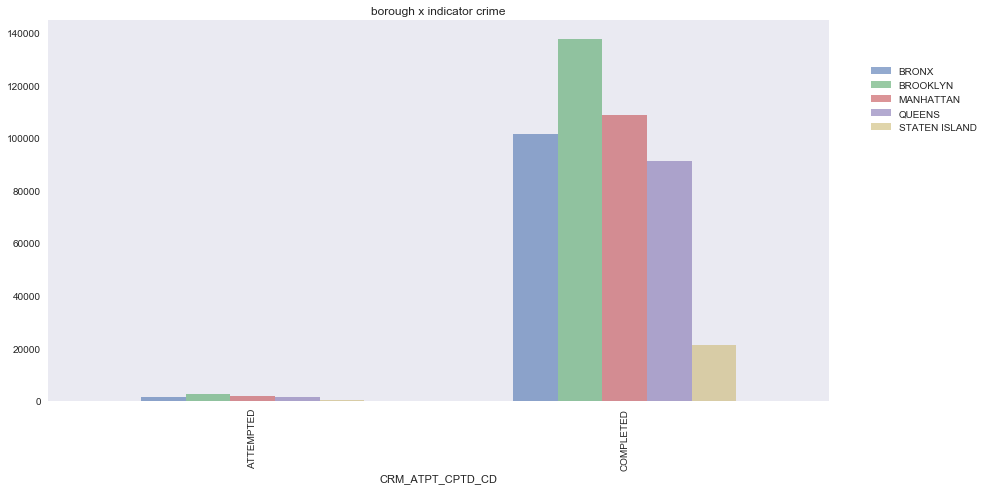

In [242]:
ds[ds['year'] == 2015]\
    .groupby(["CRM_ATPT_CPTD_CD", "BORO_NM"])['OFNS_DESC'].size()\
    .unstack()\
    .plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.6,grid=False,title="borough x indicator crime")\
    .legend(bbox_to_anchor=(1.2, 0.9))

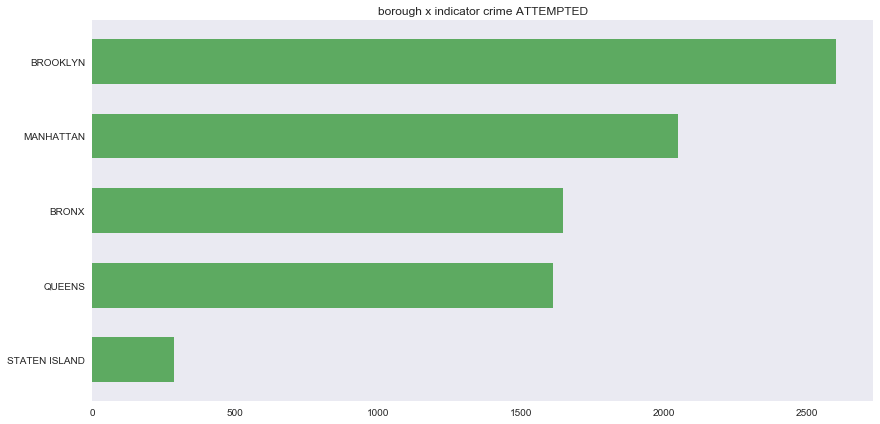

In [243]:
title = 'borough x indicator crime ATTEMPTED'

ds['BORO_NM'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.6,color='g',grid=False,title=title)

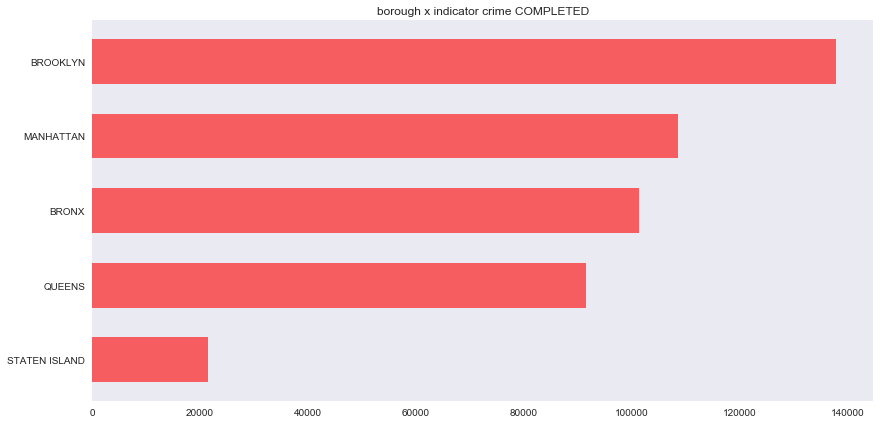

In [244]:
ds['BORO_NM'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.6,color='r',grid=False,title='borough x indicator crime COMPLETED')

In [245]:
print(ds['BORO_NM'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015].value_counts(normalize = True) * 100)
print('-------------')
print(ds['BORO_NM'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015].value_counts(normalize = True) * 100)

BROOKLYN         31.743902
MANHATTAN        24.987805
BRONX            20.109756
QUEENS           19.646341
STATEN ISLAND     3.512195
Name: BORO_NM, dtype: float64
-------------
BROOKLYN         29.920760
MANHATTAN        23.574426
BRONX            22.003971
QUEENS           19.846821
STATEN ISLAND     4.654022
Name: BORO_NM, dtype: float64


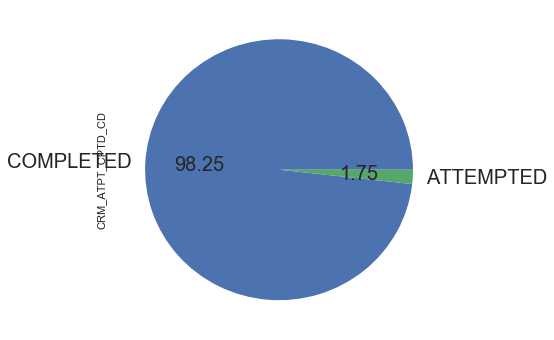

In [246]:
ds['CRM_ATPT_CPTD_CD'][ds['year'] == 2015]\
    .value_counts()\
    .plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6))

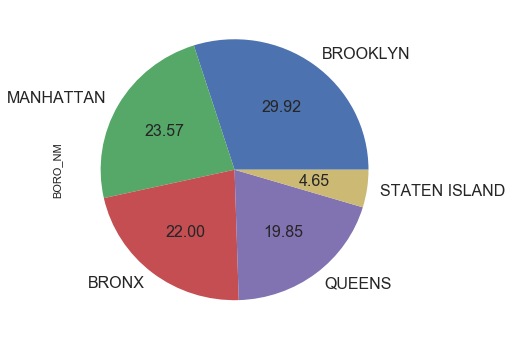

In [247]:
ds['BORO_NM'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .value_counts()\
    .plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))

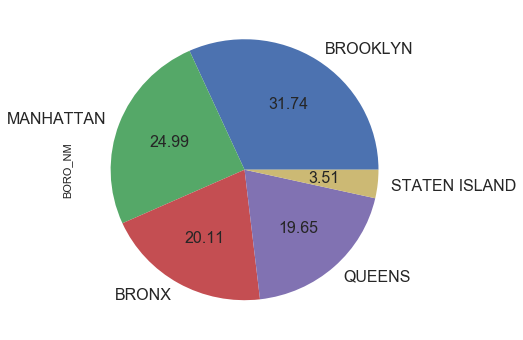

In [248]:
ds['BORO_NM'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .value_counts()\
    .plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))

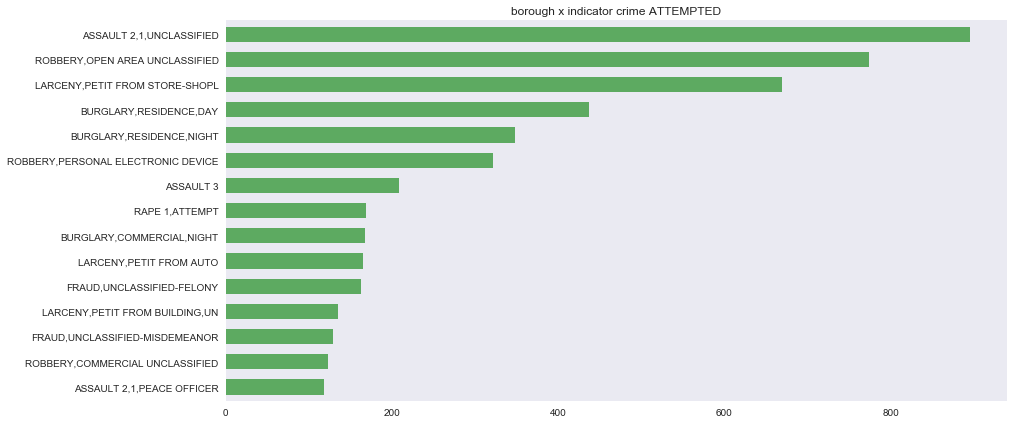

In [249]:
ds['PD_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.6,color='g',grid=False,title=title)

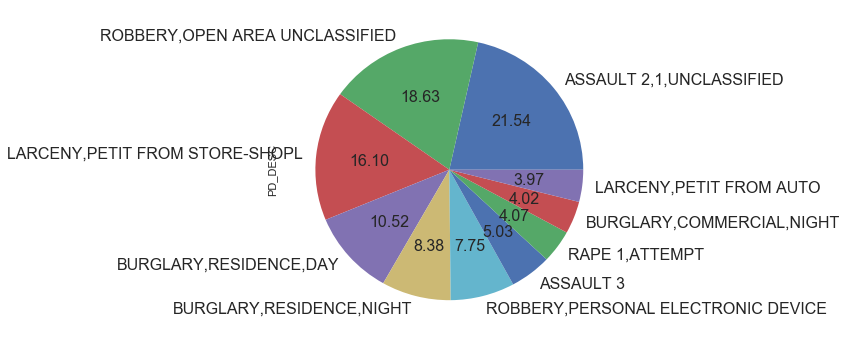

In [250]:
ds['PD_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .value_counts()[0:10]\
    .plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))

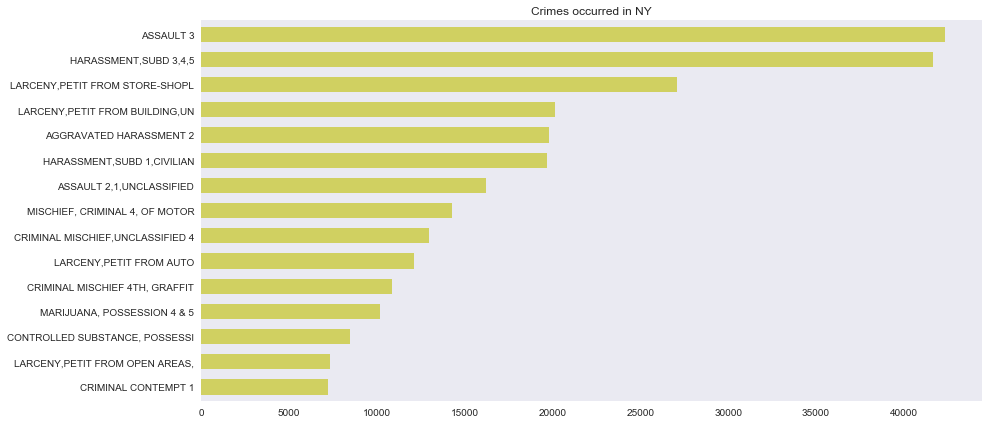

In [251]:
ds['PD_DESC'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.6,color='y',grid=False,title="Crimes occurred in NY")

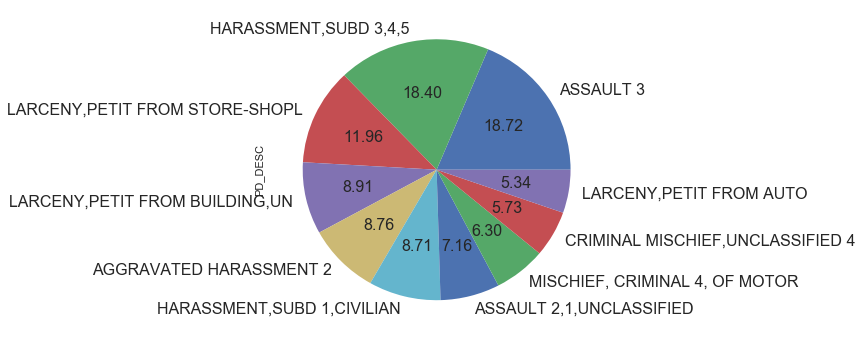

In [252]:
ds['PD_DESC'][ds['year'] == 2015]\
    .value_counts()[0:10]\
    .plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))

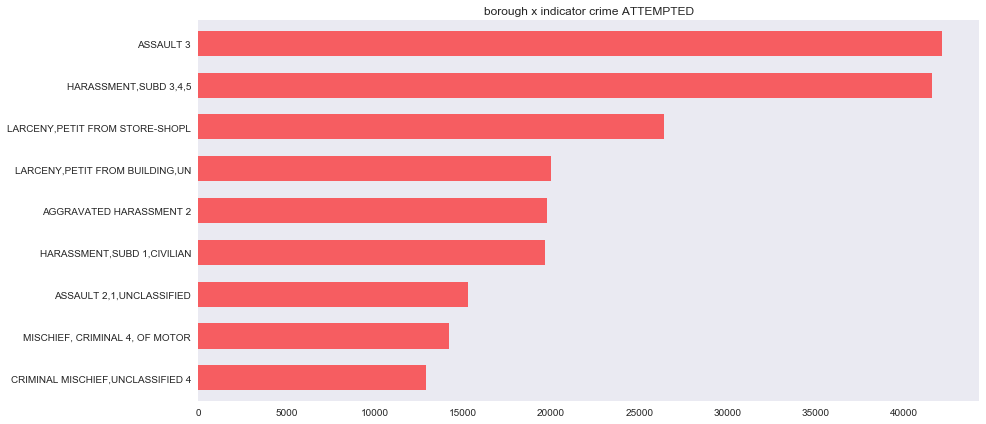

In [253]:
ds['PD_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .value_counts()[0:9]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.6,color='r',grid=False,title=title)

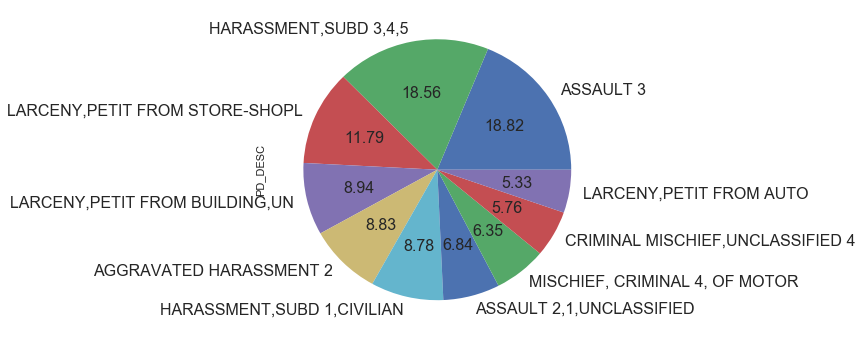

In [254]:
ds['PD_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .value_counts()[0:10]\
    .plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))

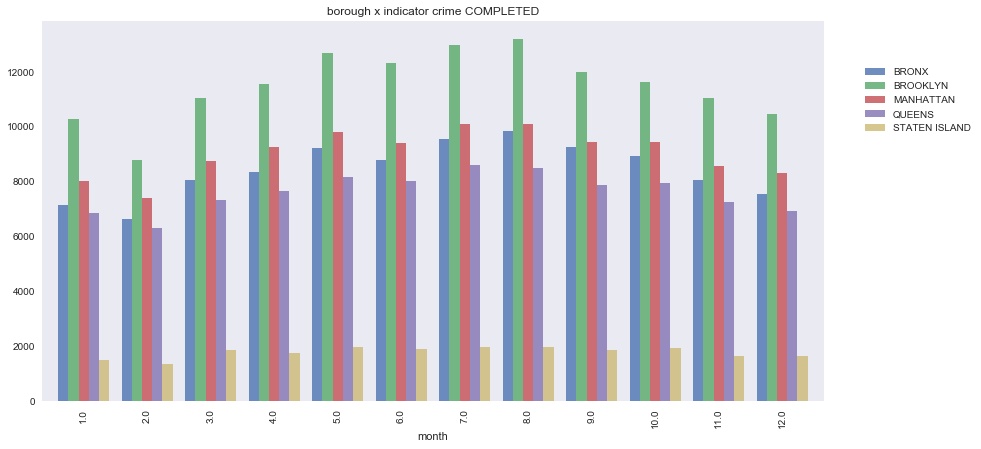

In [255]:
ds[ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .groupby(["month", "BORO_NM"]).size()\
    .unstack()\
    .plot(kind='bar', figsize=[14, 7], width=0.8, alpha=0.8, grid=False, title="borough x indicator crime COMPLETED")\
    .legend(bbox_to_anchor=(1.2, 0.9))

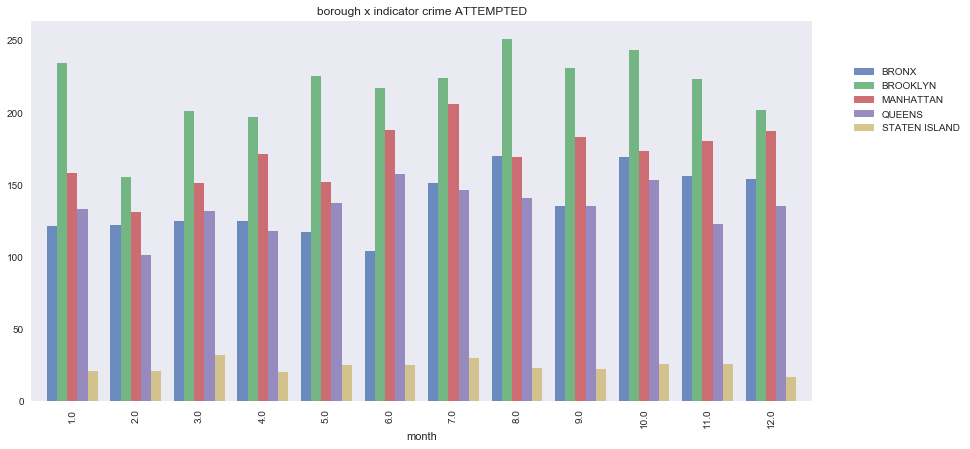

In [256]:
ds[ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .groupby(["month", "BORO_NM"]).size()\
    .unstack()\
    .plot(kind='bar', figsize=[14, 7], width=0.8, alpha=0.8, grid=False, title="borough x indicator crime ATTEMPTED")\
    .legend(bbox_to_anchor=(1.2, 0.9))

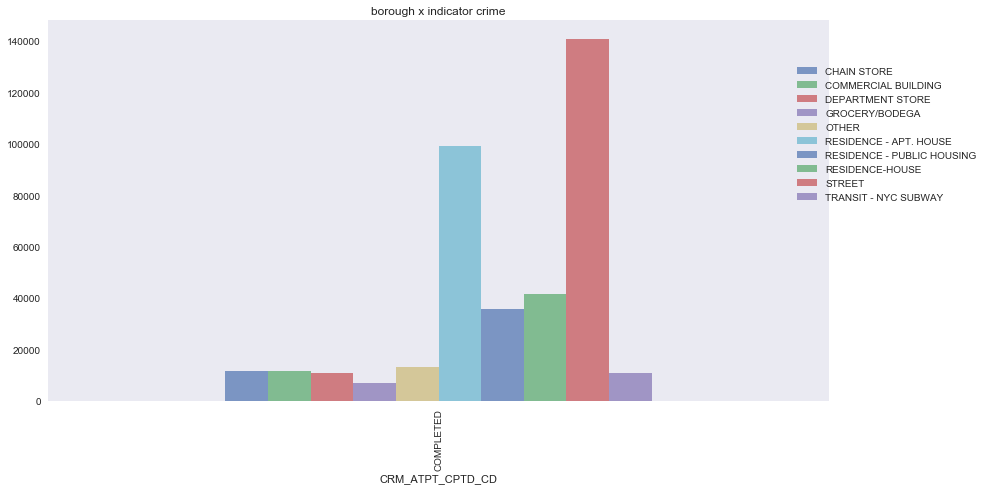

In [257]:
ds[ds['year'] == 2015]\
    .groupby(["CRM_ATPT_CPTD_CD", "PREM_TYP_DESC"])\
    .size()\
    .nlargest(10)\
    .unstack()\
    .plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.7,grid=False,title="borough x indicator crime")\
    .legend(bbox_to_anchor=(1.2, 0.9))

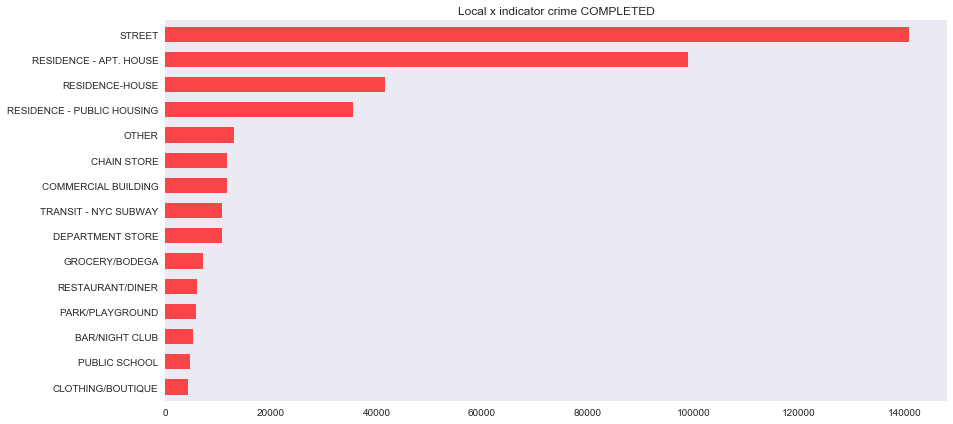

In [258]:
ds['PREM_TYP_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.7,color='r',grid=False,title="Local x indicator crime COMPLETED")

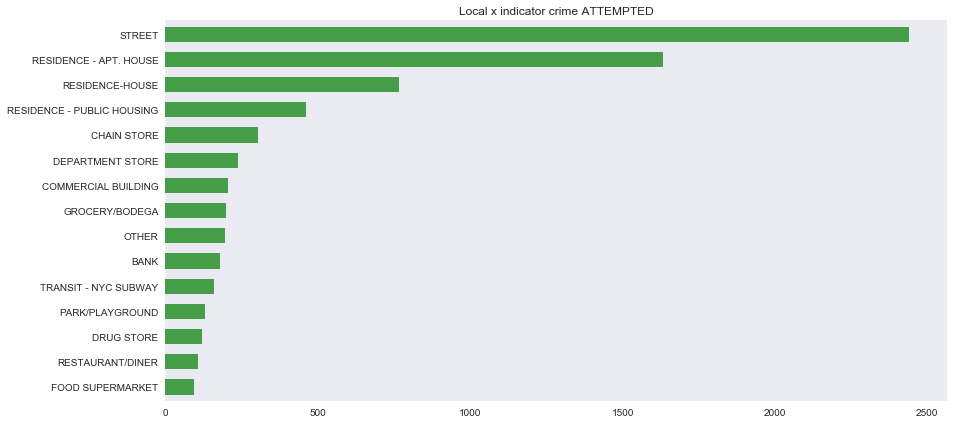

In [259]:
ds['PREM_TYP_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.7,color='g',grid=False,title="Local x indicator crime ATTEMPTED")

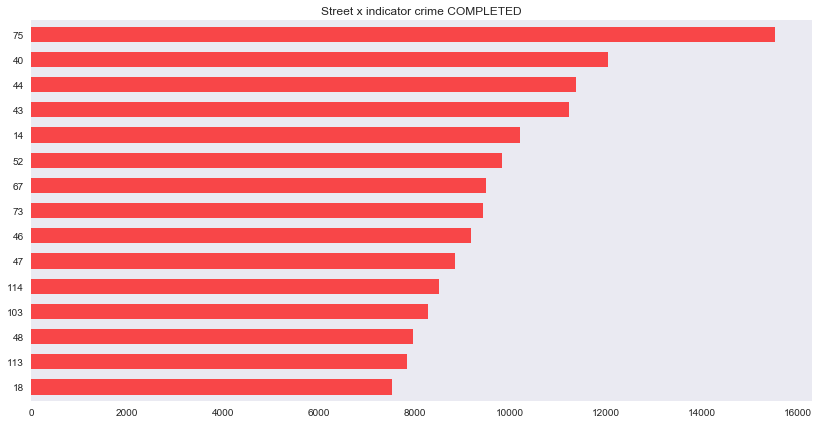

In [260]:
ds['ADDR_PCT_CD'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.7,color='r',grid=False,title="Street x indicator crime COMPLETED")

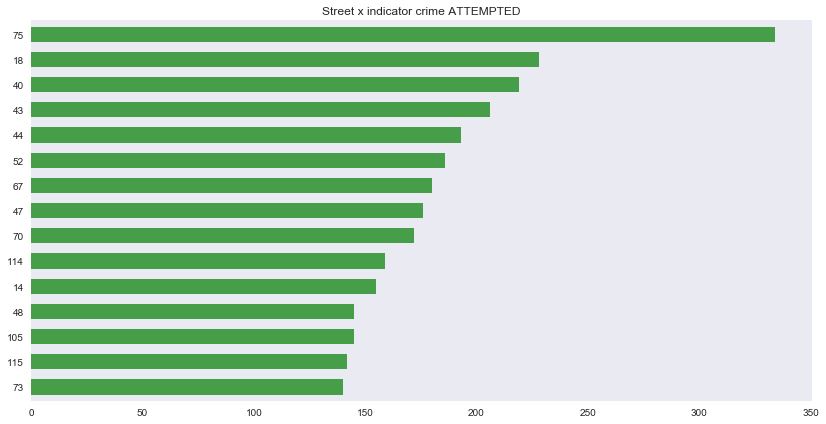

In [261]:
ds['ADDR_PCT_CD'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.7,color='g',grid=False,title="Street x indicator crime ATTEMPTED")

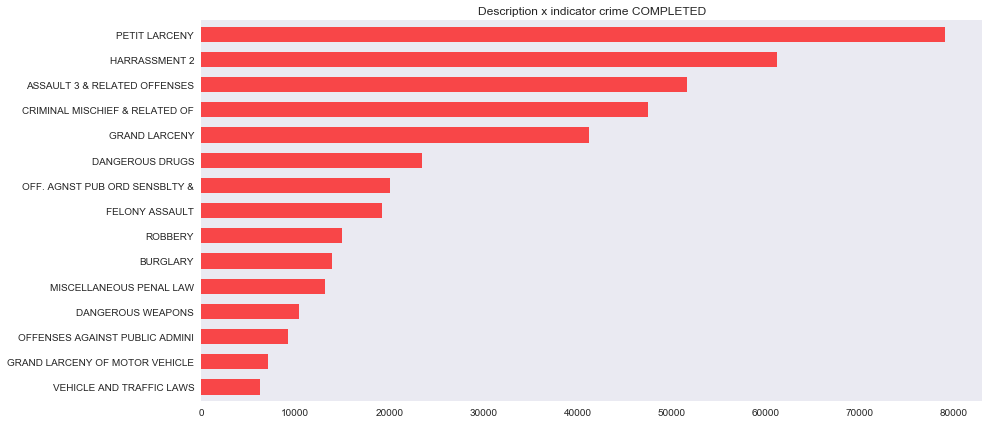

In [262]:
title = "Description x indicator crime COMPLETED"

ds['OFNS_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.7,color='r',grid=False,title=title)

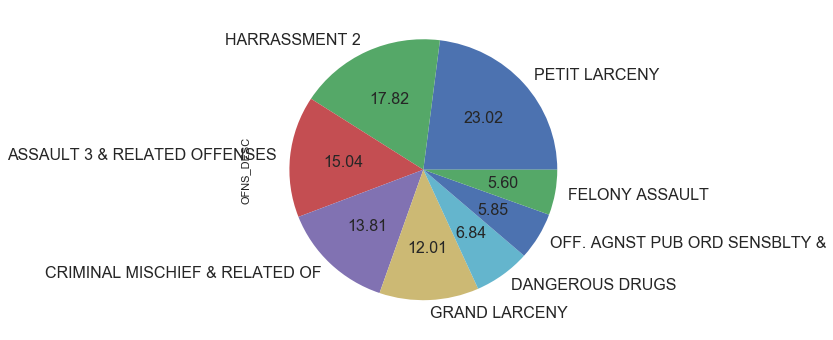

In [263]:
ds['OFNS_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .value_counts()[0:8]\
    .plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))

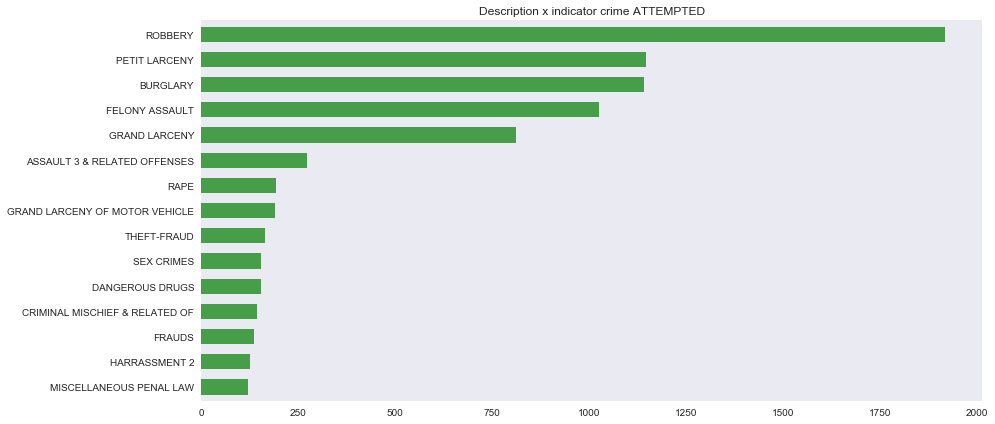

In [264]:
title = "Description x indicator crime ATTEMPTED"

ds['OFNS_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.7,color='g',grid=False,title=title)

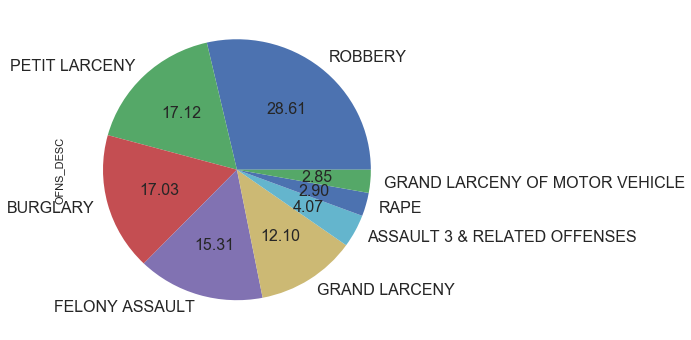

In [265]:
ds['OFNS_DESC'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .value_counts()[0:8]\
    .plot.pie(autopct='%.2f', fontsize=16, figsize=(6, 6))

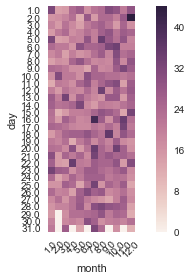

In [266]:
df = ds[ds['year'] == 2015][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'].groupby(["month","day"]).size().reset_index(name='Size')
piv = pandas.pivot_table(df, values="Size",index=["day"], columns=["month"], fill_value=0)
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()


figure = ax.get_figure()    
figure.savefig('month_ATTEMPTED.png', dpi=500)

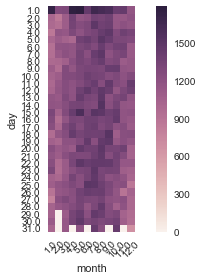

In [267]:
df = ds[ds['year'] == 2015][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'].groupby(["month","day"]).size().reset_index(name='Size')
piv = pandas.pivot_table(df, values="Size",index=["day"], columns=["month"], fill_value=0)
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()


figure = ax.get_figure()    
figure.savefig('month_COMPLETED.png', dpi=500)

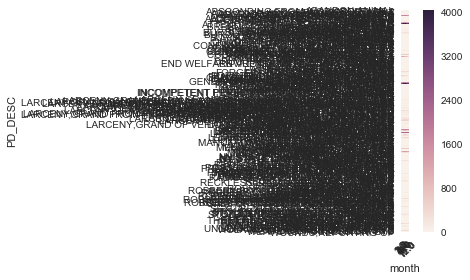

In [268]:
df = ds[ds['year'] == 2015][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED']\
    .groupby(["month","PD_DESC"])\
    .size()\
    .reset_index(name='Size')\

piv = pandas.pivot_table(df, values="Size",index=["PD_DESC"], columns=["month"], fill_value=0)
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()

figure = ax.get_figure()    
figure.savefig('PD_DESC_COMPLETED.png', dpi=500)

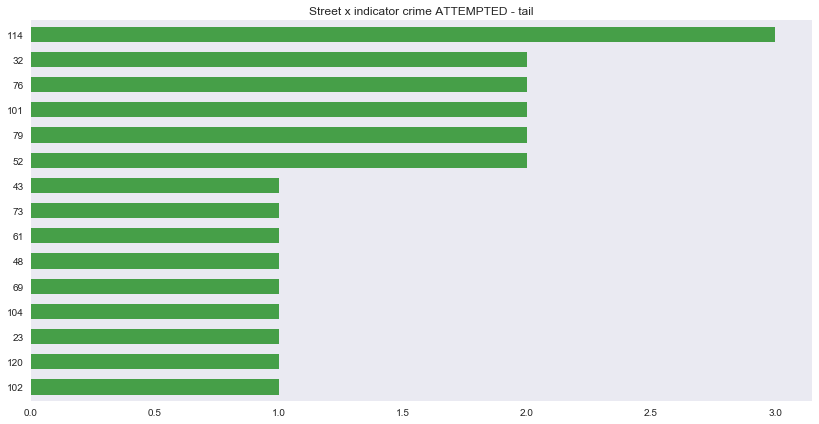

In [269]:
ds['ADDR_PCT_CD'][ds['CRM_ATPT_CPTD_CD'] == 'ATTEMPTED'][ds['year'] == 2015]\
    .tail(30)\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.7,color='g',grid=False,title="Street x indicator crime ATTEMPTED - tail")

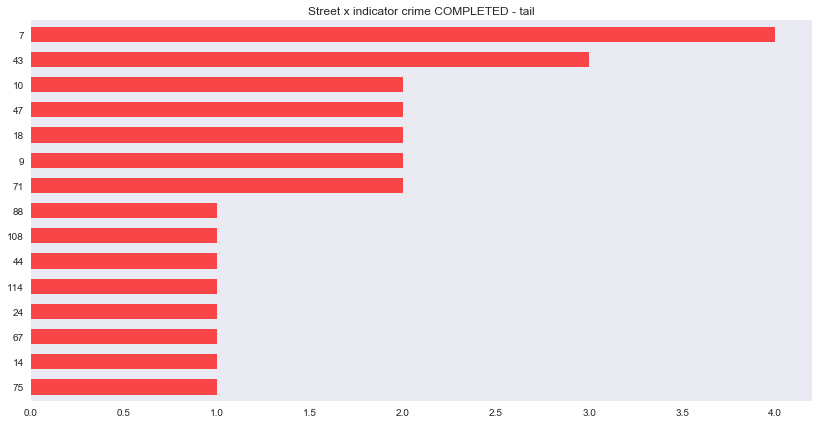

In [270]:
ds['ADDR_PCT_CD'][ds['CRM_ATPT_CPTD_CD'] == 'COMPLETED'][ds['year'] == 2015]\
    .tail(30)\
    .value_counts()[0:15]\
    .sort_values(ascending=True)\
    .plot(kind='barh', figsize=[14, 7],width=0.6,alpha=0.7,color='r',grid=False,title="Street x indicator crime COMPLETED - tail")

## Creating a new dataset with speficic data filtered from original crimes dataset

In [274]:
columns = ["CMPLNT_NUM", "RPT_DT", "OFNS_DESC", "PD_DESC", "BORO_NM", "LAW_CAT_CD", "ADDR_PCT_CD", "PREM_TYP_DESC", "CRM_ATPT_CPTD_CD", "month", "month_desc", "month_register"]
dr = ds[columns][ds["year"] == 2015]

dr = dr[dr["ADDR_PCT_CD"].notnull()]
dr['PREM_TYP_DESC'] = dr['PREM_TYP_DESC'].fillna('N/A')

for item in range(dr.shape[0]):
    if dr.iloc[item, 1] == "MURDER & NON-NEGL. MANSLAUGHTER":
        dr.iloc[item, 2] = "MURDER & NON-NEGL. MANSLAUGHTER"

del dr["OFNS_DESC"]
del dr["RPT_DT"]
del dr["month"]
del dr["month_register"]

dr.to_csv("Crimes_Filtered.csv", index_label = ["CMPLNT_NUM"])
dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468575 entries, 0 to 478347
Data columns (total 8 columns):
CMPLNT_NUM          468575 non-null object
PD_DESC             468239 non-null object
BORO_NM             468575 non-null object
LAW_CAT_CD          468575 non-null object
ADDR_PCT_CD         468575 non-null object
PREM_TYP_DESC       468575 non-null object
CRM_ATPT_CPTD_CD    468575 non-null object
month_desc          468575 non-null object
dtypes: object(8)
memory usage: 52.2+ MB
